Used Car Data Review
Gabriel Richards
September 2024

My name is Gabriel Richards and this Jupyter notebook reviews a dataset of used cars for sale. 

This notebook will examine the distributions of these measurements and variances between the species.


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display, Markdown



# Load the cardetails dataset into DataFrame
df = pd.read_csv('./data/cardetails.csv')

## Initial Data Inspection & Descriptive Statistics

# Inspect first rows of the DataFrame
print(df.head())


            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel_Type Transmission   Location   Color   Owner Seller_Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max_Power              Max_Torque Drivetrain  Length   W

Here is an excerpt of the top 10 rows of the data we will be examining.

In [25]:
print("Total Rows, Total Columns")
print(df.shape)




Total Rows, Total Columns
(2059, 20)


There are 20 columns and 2059 rows in this dataset. 

In [26]:
print(df.dtypes)

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel_Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller_Type            object
Engine                 object
Max_Power              object
Max_Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating_Capacity      float64
Fuel_Tank_Capacity    float64
dtype: object


Here are each of the column names and their data type.

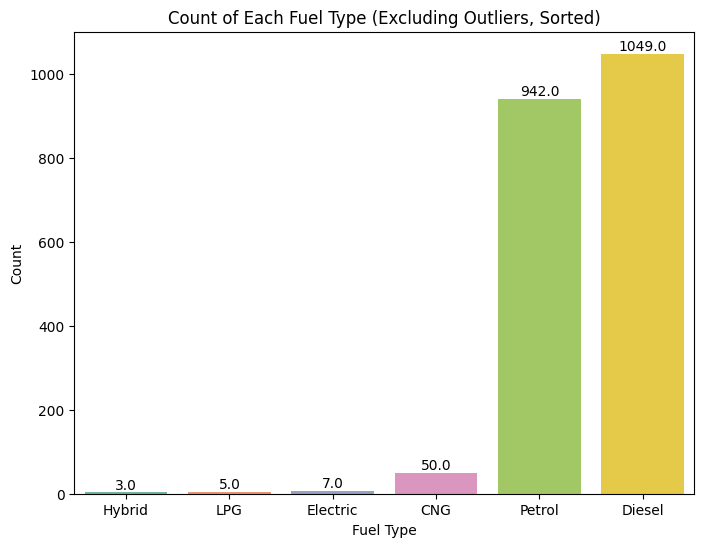

In [27]:


# Calculate the threshold for 0.1% of the total rows
threshold = len(df) * 0.001

# Filter out the fuel types with counts less than the threshold
fuel_counts = df['Fuel_Type'].value_counts()
filtered_fuel_types = fuel_counts[fuel_counts >= threshold].index

# Create a new DataFrame with only the filtered fuel types
df_filtered = df.loc[df['Fuel_Type'].isin(filtered_fuel_types)].copy()

# Sort fuel types by count in ascending order
df_filtered['Fuel_Type'] = pd.Categorical(df_filtered['Fuel_Type'], categories=fuel_counts[filtered_fuel_types].sort_values().index)

# Create a count plot for the filtered 'Fuel_Type' column
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Fuel_Type', hue='Fuel_Type', data=df_filtered, order=df_filtered['Fuel_Type'].cat.categories, palette="Set2", legend=False)

# Add count labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Add labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Count of Each Fuel Type (Excluding Outliers, Sorted)')

# Display the plot
plt.show()

Here is a histogram of each the 4 numerical columns in the CSV. In addition to 4, there is also a species column for each row.

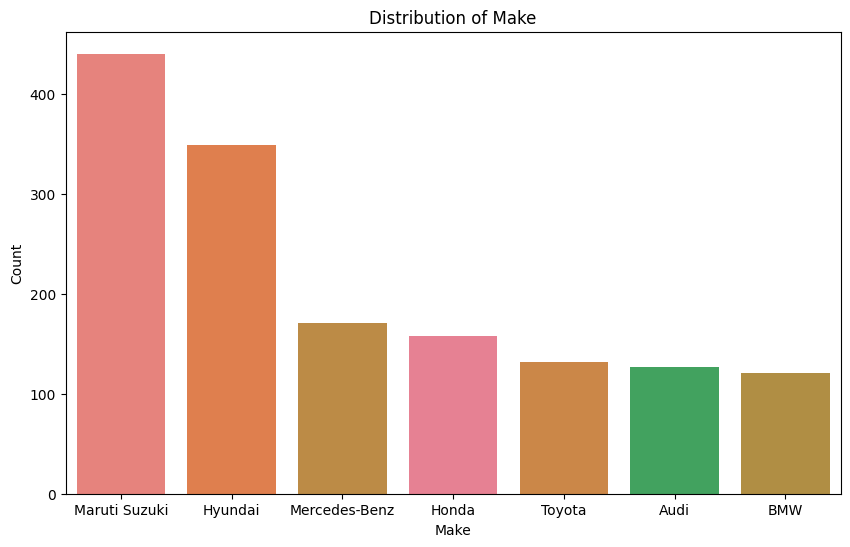

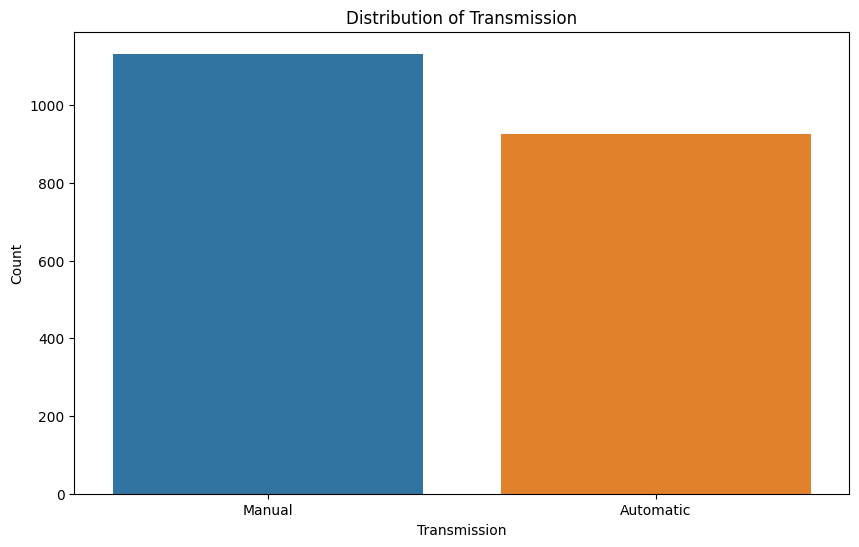

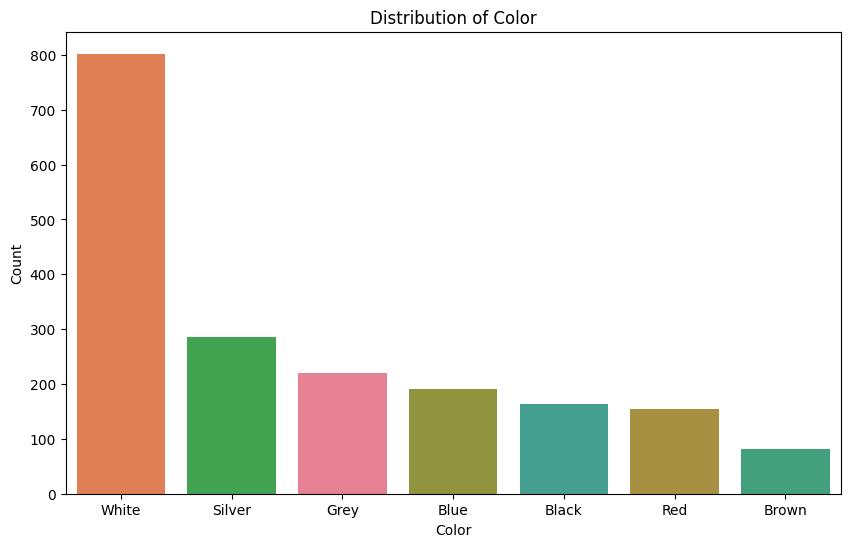

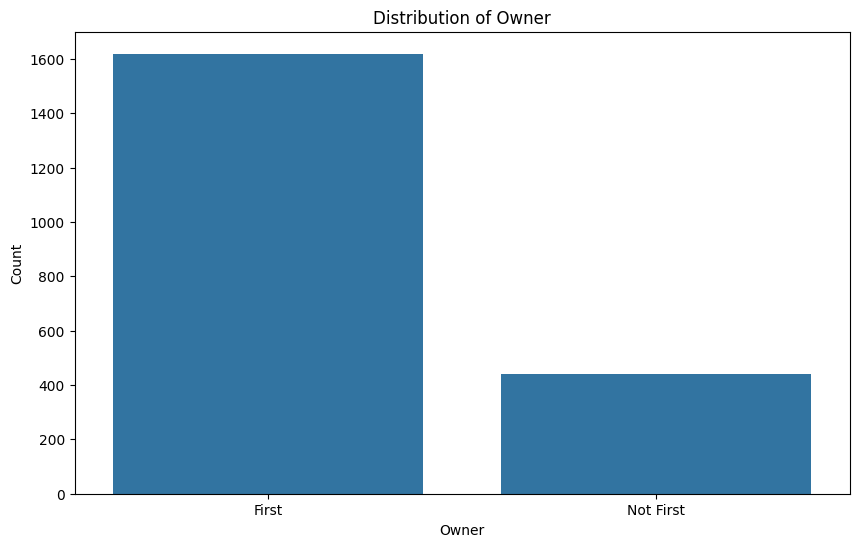

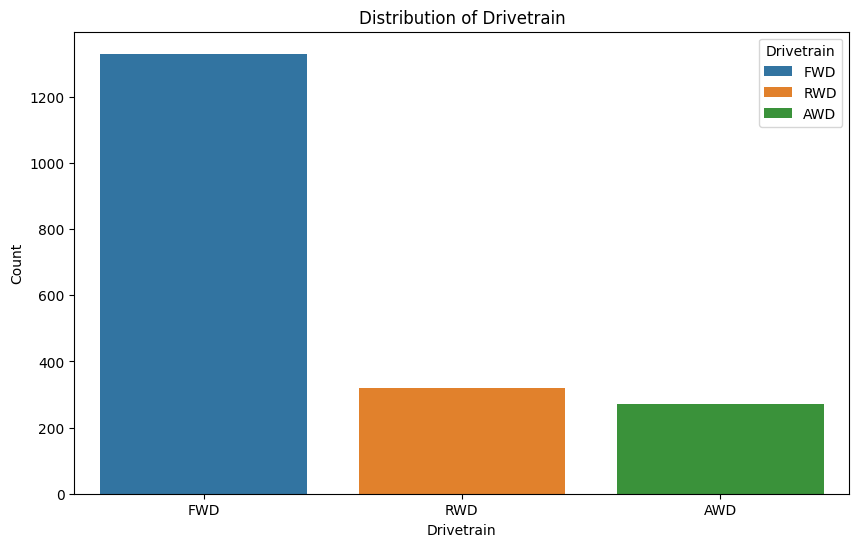

In [33]:

# Define the columns and their respective limits
column_limits = {
    'Make': 7,
    'Transmission': 2,
    'Color': 7,
    'Owner': 2,
    'Drivetrain': 3
}

# For owner, separate 'First' and 'Not First'
df['Owner_Category'] = df['Owner'].apply(lambda x: 'First' if x == 'First' else 'Not First')

# Loop through each specified column and its limit
for col, limit in column_limits.items():
    plt.figure(figsize=(10, 6))
    if col == 'Owner':
        # Use the new 'Owner_Category' for the owner column
        sns.countplot(x='Owner_Category', data=df)
    else:
        # Display count plot for the column
        sns.countplot(x=col, hue=col, data=df, order=df[col].value_counts().index[:limit])
    
    # Set title and labels
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')

    # Show the plot for each column
    plt.show()

Here is a histogram of the species distribution in the CSV. There are 50 samples for each of the 3 species - Setosa, Versicolor, and Virginica.

In [39]:
'''Step 6. Initial Data Transformation and Feature Engineering

Use pandas and other tools to perform transformations as needed. 
Transformation may include renaming columns, adding new columns, 
or transforming existing data for more in-depth analysis.'''

# Renaming column
df.rename(columns={'Max_Power': 'Max Power'}, inplace=True)
df.rename(columns={'Max_Torque': 'Max Torque'}, inplace=True)



# Adding a new column for 'Vehicular Volume'
df['Vehicular Volume'] = df['Length'] * df['Width'] * df['Height']



# Ensure that 'Max_Power' and 'Max_Torque' are treated as strings for extraction
df['Max Power'] = df['Max Power'].astype(str)
df['Max Torque'] = df['Max Torque'].astype(str)

# Split Max_Power into two new columns: Max_Power_bhp and Max_Power_rpm
df[['Max_Power_bhp', 'Max_Power_rpm']] = df['Max Power'].str.extract(r'(\d+)\s*bhp\s*@\s*(\d+)\s*rpm')

# Split Max_Torque into two new columns: Max_Torque_Nm and Max_Torque_rpm
df[['Max_Torque_Nm', 'Max_Torque_rpm']] = df['Max Torque'].str.extract(r'(\d+)\s*Nm\s*@\s*(\d+)\s*rpm')

# Convert the new columns to numeric types (float or int), coercing errors
df['Max_Power_bhp'] = pd.to_numeric(df['Max_Power_bhp'], errors='coerce')
df['Max_Power_rpm'] = pd.to_numeric(df['Max_Power_rpm'], errors='coerce')
df['Max_Torque_Nm'] = pd.to_numeric(df['Max_Torque_Nm'], errors='coerce')
df['Max_Torque_rpm'] = pd.to_numeric(df['Max_Torque_rpm'], errors='coerce')


               Make                                  Model  Max_Power_bhp  \
0             Honda                    Amaze 1.2 VX i-VTEC           87.0   
1     Maruti Suzuki                        Swift DZire VDI           74.0   
2           Hyundai                   i10 Magna 1.2 Kappa2           79.0   
3            Toyota                               Glanza G           82.0   
4            Toyota        Innova 2.4 VX 7 STR [2016-2020]          148.0   
...             ...                                    ...            ...   
2054       Mahindra                  XUV500 W8 [2015-2017]          138.0   
2055        Hyundai                           Eon D-Lite +           55.0   
2056           Ford            Figo Duratec Petrol ZXI 1.2           70.0   
2057            BMW  5-Series 520d Luxury Line [2017-2019]          188.0   
2058       Mahindra      Bolero Power Plus ZLX [2016-2019]           70.0   

      Max_Power_rpm  Max_Torque_Nm  Max_Torque_rpm  
0            6000.0   

Max Power and Max Torque were retitled, and split into new rows Max bhp|Nm and rpm, to be used as integers

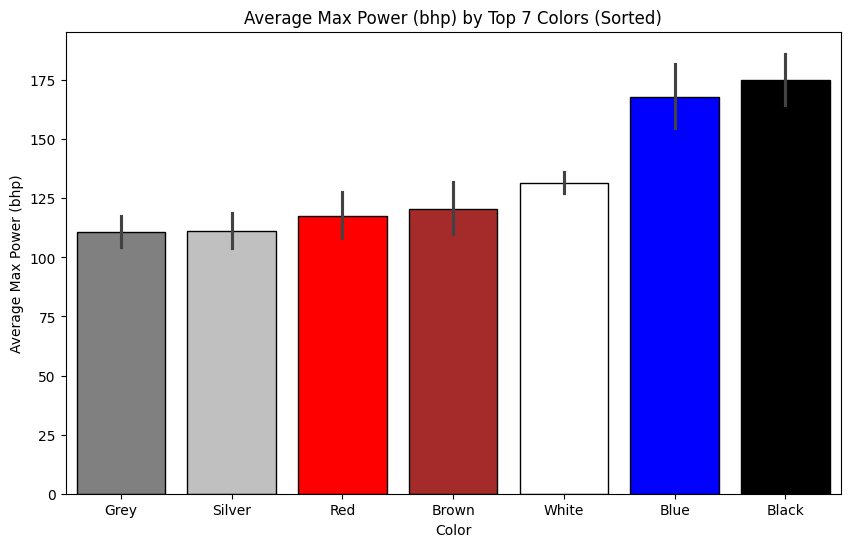

In [54]:
# Define the color mapping for the bar plot
color_mapping = {
    'White': 'white',
    'Silver': 'silver',
    'Grey': 'grey',
    'Blue': 'blue',
    'Black': 'black',
    'Red': 'red',
    'Brown': 'brown'
}

# Calculate the average Max_Power_bhp for each color
color_avg_max_power = df.groupby('Color')['Max_Power_bhp'].mean()

# Get the top 7 colors based on the count of occurrences
top_colors = df['Color'].value_counts().nlargest(7).index

# Filter the dataset to only include rows with the top 7 colors
df_top_colors = df[df['Color'].isin(top_colors)]

# Sort the color_avg_max_power by the average Max_Power_bhp in ascending order
sorted_colors = color_avg_max_power.loc[top_colors].sort_values().index

# Plot the histogram, sorting colors from least to greatest by average Max_Power_bhp
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x='Color', 
    y='Max_Power_bhp', 
    data=df_top_colors, 
    order=sorted_colors, 
    dodge=False,  # Disable dodge
    edgecolor='black'  # Add black outlines to the bars
)

# Set the colors manually for each bar to match the colors in the color_mapping
for bar, color in zip(bars.patches, sorted_colors):
    bar.set_facecolor(color_mapping[color])  # Set the face color from color_mapping

# Set plot title and labels
plt.title('Average Max Power (bhp) by Top 7 Colors (Sorted)')
plt.xlabel('Color')
plt.ylabel('Average Max Power (bhp)')

# Display the plot
plt.show()



Across all 3 species, the average Sepal Area is comparable, within 3 square centimeters (minimum ~16cm, maximum ~). Petal area varies wildly. The Setosa species clearly tends to have very small petals, but has very typical Sepal areas to the other species.

We can see no major changes when when comparing the median and area of each species.

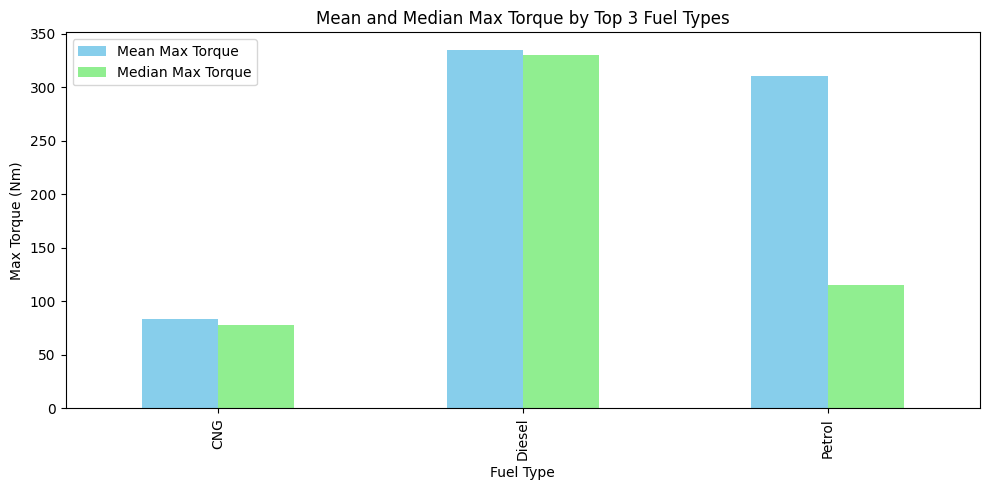

In [63]:

# Assuming df is already defined and contains the necessary data
# Count the occurrences of each Fuel_Type and get the top 3
top_fuel_types = df['Fuel_Type'].value_counts().nlargest(3).index

# Filter the DataFrame to only include the top 4 Fuel_Types
df_filtered = df[df['Fuel_Type'].isin(top_fuel_types)]

# Group by Fuel_Type to calculate average and median Max_Torque
mean_areas = df_filtered.groupby('Fuel_Type')[['Max_Torque_Nm']].mean().rename(columns={'Max_Torque_Nm': 'Mean Max Torque'})
median_areas = df_filtered.groupby('Fuel_Type')[['Max_Torque_Nm']].median().rename(columns={'Max_Torque_Nm': 'Median Max Torque'})

# Concatenate the mean and median areas into a single DataFrame
combined_areas = pd.concat([mean_areas, median_areas], axis=1)

# Plotting
plt.figure(figsize=(10, 5))
combined_areas.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightgreen'])

# Set title and labels
plt.title('Mean and Median Max Torque by Top 3 Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Max Torque (Nm)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

CNG

In [180]:
# Calculate minimum and maximum values for Sepal Area and Petal Area
min_sepal_area = df['Sepal Area'].min()
max_sepal_area = df['Sepal Area'].max()
min_petal_area = df['Petal Area'].min()
max_petal_area = df['Petal Area'].max()

# Identify the species for the min and max values
min_sepal_area_species = df[df['Sepal Area'] == min_sepal_area]['species'].values[0]
max_sepal_area_species = df[df['Sepal Area'] == max_sepal_area]['species'].values[0]
min_petal_area_species = df[df['Petal Area'] == min_petal_area]['species'].values[0]
max_petal_area_species = df[df['Petal Area'] == max_petal_area]['species'].values[0]

# Prepare the Markdown text
markdown_text = f"""
### Sepal and Petal Area Statistics

- **Minimum Sepal Area**: {min_sepal_area:.2f} cm² (Species: {min_sepal_area_species})
- **Maximum Sepal Area**: {max_sepal_area:.2f} cm² (Species: {max_sepal_area_species})
- **Minimum Petal Area**: {min_petal_area:.2f} cm² (Species: {min_petal_area_species})
- **Maximum Petal Area**: {max_petal_area:.2f} cm² (Species: {max_petal_area_species})
"""

# Display the Markdown
display(Markdown(markdown_text))


### Sepal and Petal Area Statistics

- **Minimum Sepal Area**: 10.00 cm² (Species: versicolor)
- **Maximum Sepal Area**: 30.02 cm² (Species: virginica)
- **Minimum Petal Area**: 0.11 cm² (Species: setosa)
- **Maximum Petal Area**: 15.87 cm² (Species: virginica)


Here we can see the extremes of the newly created Sepal and Petal Area columns across all 150 rows, and the associated species for each extreme.

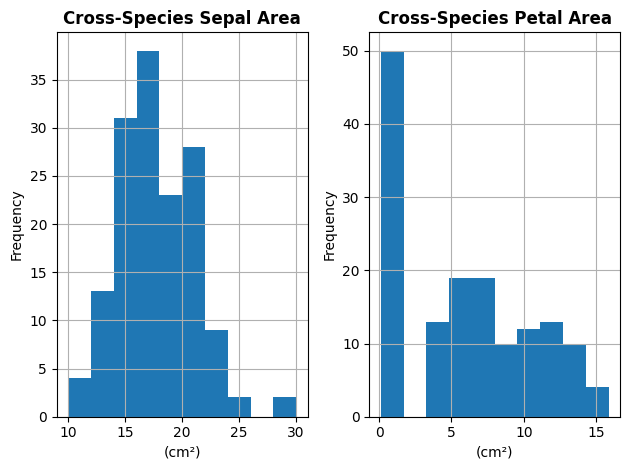

In [181]:
'''Step 7. Initial Visualizations

Create a variety of chart types using seaborn and matplotlib to showcase different aspects of the data. There is a guided example in the resources section at the end of this document.

Jupyter Notebook / Python cell example:
sns.pairplot(df, hue='species') 
plt.show()'''


# Inspect histograms only for 'Sepal Area' and 'Petal Area'
axes = df[['Sepal Area', 'Petal Area']].hist()

# Add axis labels and titles with appropriate units
titles = ['Cross-Species Sepal Area', 'Cross-Species Petal Area']
for ax, title, label in zip(axes.flatten(), titles, ['(cm²)', '(cm²)']):
    ax.set_title(title, fontweight='bold')  # Set title for each subplot
    ax.set_xlabel(label)                    # Set x-axis label
    ax.set_ylabel('Frequency')              # Set y-axis label


# Display the plot
plt.tight_layout()
plt.show()




The graph above examines the distributions of the cross-species areas for all 3 species in the 150 row sample.
The Cross-Species Sepal Area shows a very apparent Normal Distribution, or 'Bell-Curve'. 
The Cross-Species Petal Area however is harder to read, due to the high degree of outliers below ~2 cm².

In [182]:
# Calculate the number of values below 2 in the Petal Area column
petal_area_below_2_count = df[df['Petal Area'] < 2]['Petal Area'].count()

# Display the live count in markdown format
display(Markdown(f"**Count of Petal Area values below 2 cm²: {petal_area_below_2_count} rows**"))


# Calculate the total number of rows in the Petal Area column
total_petal_area_count = df['Petal Area'].count()
display(Markdown(f"**iris.csv total row count Area values below 2 cm²: {total_petal_area_count} rows**"))



# Percentage of rows below 2
percentage_below_2 = (petal_area_below_2_count / total_petal_area_count) * 100

display(Markdown(f"**Percentage of rows with Petal Area below 2 cm²: {percentage_below_2:.2f}%**"))


# Count of rows for the Setosa species
setosa_count = df[df['species'] == 'setosa'].shape[0]
display(Markdown(f"**Setosa count with Petal Area below 2 cm²: {setosa_count}**"))


**Count of Petal Area values below 2 cm²: 50 rows**

**iris.csv total row count Area values below 2 cm²: 150 rows**

**Percentage of rows with Petal Area below 2 cm²: 33.33%**

**Setosa count with Petal Area below 2 cm²: 50**

Reviewing Closer, all of 50 samples with Petal Areas below 2cm² are the Setosa Species. 

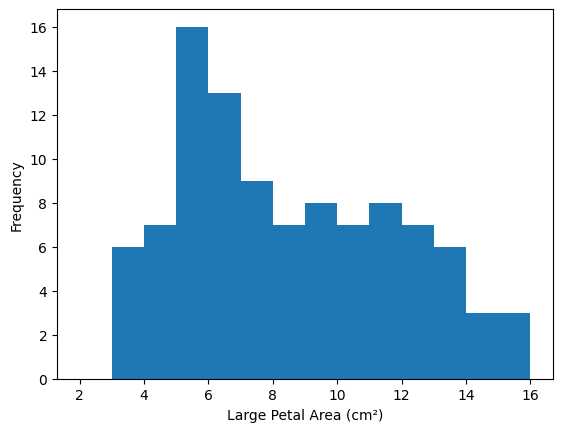

In [183]:



df['Over 2cm Petal Area'] = df['Petal Area'].where(df['Petal Area'] >= 2)

# Plot the histogram using plt
plt.hist(df['Over 2cm Petal Area'], bins=14, range=(2, 16))

# Add labels to the x and y axes
plt.xlabel('Large Petal Area (cm²)')
plt.ylabel('Frequency')

# Display the plot
plt.show()



Consider all Petal Areas over 2cm Large. We see those other 2 species, 
When removing the Setosa outliers below 2 centimeters squared from the Petal Area table, the Versicolor and Virginica species combined Petal Area average form yet another bell curve. Note with a slight bump with 29 rows between 5 and 7 cm².

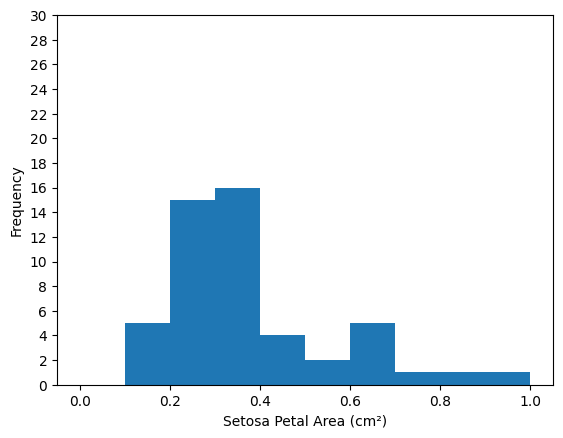

In [184]:
# Create a new column for petal area values <= 2
df['Sub-Two Petal Area'] = df['Petal Area'].where(df['Petal Area'] <= 2)

# Plot the histogram using plt
plt.hist(df['Sub-Two Petal Area'], bins=10, range=(0, 1))

# Add labels to the x and y axes
plt.xlabel('Setosa Petal Area (cm²)')
plt.ylabel('Frequency')

# Set y-axis ticks every 2 units
plt.yticks(range(0, int(df['Sub-Two Petal Area'].count()) + 2, 2))

# Set the maximum y-axis limit
plt.ylim(0, 30)

# Display the plot
plt.show()

While The Setosa species it self has a bell-ish distribution, it is heavily clustered 

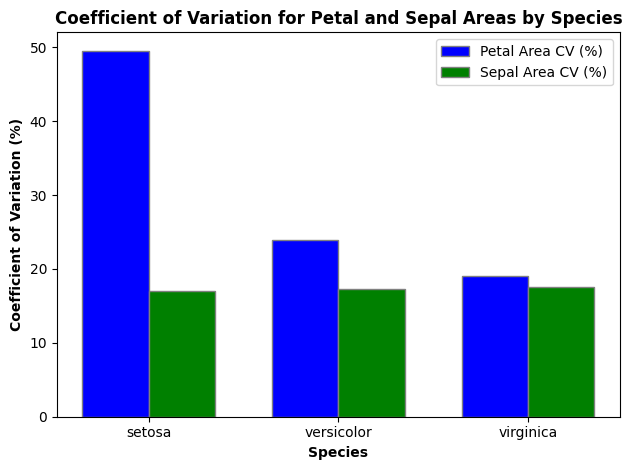

In [185]:

# Function to calculate Coefficient of Variation
def calculate_cv(series):
    return series.std() / series.mean() * 100  # Multiply by 100 to get percentage

# Calculate CV for each species
cv_data = {
    'Species': [],
    'Petal Area CV (%)': [],
    'Sepal Area CV (%)': []
}

for species in df['species'].unique():
    cv_data['Species'].append(species)
    cv_data['Petal Area CV (%)'].append(calculate_cv(df[df['species'] == species]['Petal Area']))
    cv_data['Sepal Area CV (%)'].append(calculate_cv(df[df['species'] == species]['Sepal Area']))

# Convert to DataFrame for easier plotting
cv_df = pd.DataFrame(cv_data)

# Set the bar width
bar_width = 0.35

# Set positions of bar on X axis
r1 = range(len(cv_df['Species']))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.bar(r1, cv_df['Petal Area CV (%)'], color='b', width=bar_width, edgecolor='grey', label='Petal Area CV (%)')
plt.bar(r2, cv_df['Sepal Area CV (%)'], color='g', width=bar_width, edgecolor='grey', label='Sepal Area CV (%)')

# Add labels and title
plt.xlabel('Species', fontweight='bold')
plt.ylabel('Coefficient of Variation (%)', fontweight='bold')
plt.title('Coefficient of Variation for Petal and Sepal Areas by Species', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(cv_df['Species']))], cv_df['Species'])
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

We can compare the coefficient of variation for each species to calculate which has the widest distribution.
A higher Coefficient of Variation means values in the set were less clustered, and the set had greater variance.
Comparing all 3 species, we can see while they all have consistent variance within their Sepal Area, 
This is despite the Setosa Petal Area values all being clustered below 1cm - a small bin compared to the interspecies distribution
While not provable within the scope of this exercise, I suspect this may be due to the difficulty in accurately measu